# **COMP8221 - Week 6**

In this workshop, we will introduce two packages, [NetworkX](https://networkx.org/documentation/stable/) and [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

For the PyTorch Geometric section, you don't need to understand all the details already. Concepts and implementations of graph neural network will be covered in future lectures and workshops.


# NetworkX Tutorial

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

Main parts of this tutorial are adapted from https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

## Setup

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

^C


In [5]:
# Import the NetworkX package
import networkx as nx

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graph. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [6]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [7]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [8]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}})

In [9]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

Similar to nodes, edges (with attributes) can also be easily added to NetworkX graphs.

In [10]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [11]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges(data=True):
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1, {'weight': 0.5})
(0, 2, {'weight': 0.1})
(1, 2, {'weight': 0.3})
G has 3 edges


## Visualization
NetworkX also provides tooling to conventiently visualize graphs.

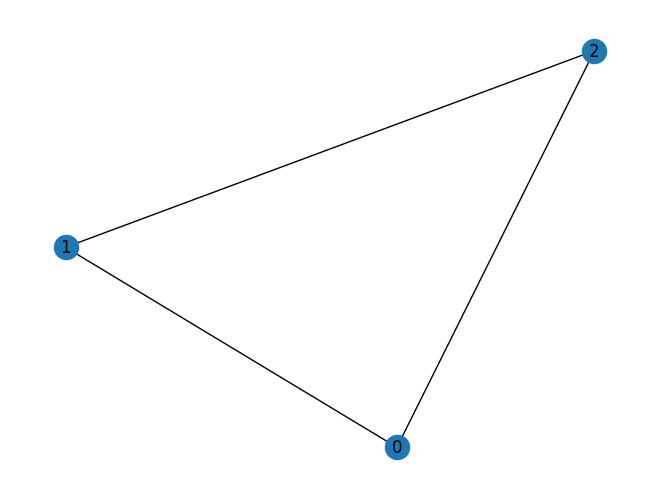

In [12]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbor

In [13]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Other Functionalities

NetworkX also provides plenty of useful methods to study graphs.

Here is an example to get [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) of nodes for more information!).

The **PageRank** function in **NetworkX** calculates a **“score of importance”** for each node in a **directed graph** — representing how influential or central each node is, based on the structure of incoming links.

In other words:

> PageRank estimates the **probability that a random walker** will land on a given node at any step of a long random walk through the network.

---

### 🔹 Intuitive Meaning

* A node gets a **high PageRank** if:

  * It is **linked to by many other nodes**, especially by other **important nodes**.
  * It has **inbound edges** from nodes that themselves have **high PageRank** values.

So it’s not just about *how many* links point to a node — it’s about *who* links to it.

---

### 🔹 Formula (simplified)

For a directed graph $ G = (V, E) $, the PageRank of a node $ i $ is:

$$
PR(i) = \frac{1 - d}{N} + d \sum_{j \in M_i} \frac{PR(j)}{L(j)}
$$

Where:

* ( N ): total number of nodes
* ( d ): damping factor (default in NetworkX: 0.85)
* $ M_i $: set of nodes linking **to** node ( i )
* $ L(j) $: number of outbound links from node ( j )
* $ \frac{1 - d}{N} $: probability of jumping to a random node (the "teleportation" term)

---

### 🔹 In NetworkX

Function signature:

```python
networkx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06, weight='weight')
```

* **`G`**: Directed graph (`DiGraph`)
* **`alpha`**: Damping factor (probability of following a link)
* **`weight`**: Edge attribute to use as weight (if provided)
* Returns: a dictionary mapping each node → PageRank score


In [14]:
nx.path_graph(num_nodes)

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

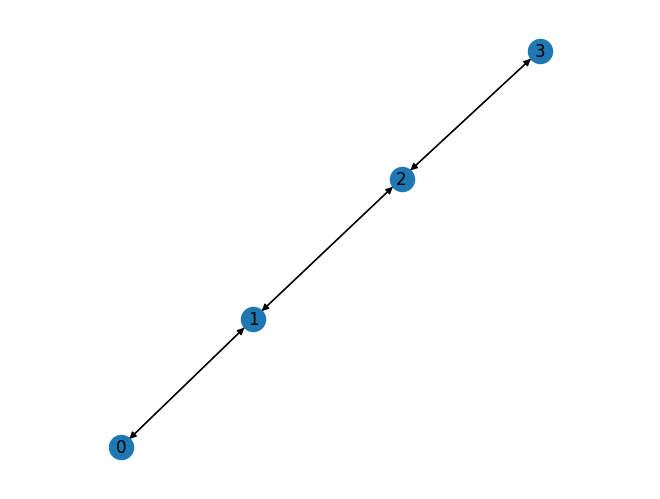

In [15]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## Documentation

You can explore more NetworkX functions through its [documentation](https://networkx.org/documentation/stable/).

# PyTorch Geometric Tutorial

PyTorch Geometric (PyG) is an extension library for PyTorch. It provides useful primitives to develop Graph Deep Learning models, including various graph neural network layers and a large number of benchmark datasets.

Don't worry if you don't understand some concepts such as `GCNConv` -- we will cover all of them in the future lectures :)

This tutorial is adapted from https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI by [Matthias Fey](https://rusty1s.github.io/#/)


In [16]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.8.0+cpu


## Installing dependencies

The installation of PyG on this workshop can be a little bit tricky. Execute the cell below -- in case of issues, more information can be found on the [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

_Note: This cell might take a while (up to ~10 minutes) to run_

In [14]:
# Install torch geometric
# !pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
# !pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
# !pip install torch-scatter 
!pip install -q torch-geometric

## Visualization

In [17]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Introduction

Recently, deep learning on graphs has emerged to one of the hottest research fields in the deep learning community.
Here, **Graph Neural Networks (GNNs)** aim to generalize classical deep learning concepts to irregular structured data (in contrast to images or texts) and to enable neural networks to reason about objects and their relations.

This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks based on the **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension library to the popular deep learning framework [PyTorch](https://pytorch.org/), and consists of various methods and utilities to ease the implementation of Graph Neural Networks.

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), let's dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club. Here, we are interested in detecting communities that arise from the member's interaction.

## Dataset

PyTorch Geometric provides an easy access to the dataset via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [18]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) dataset, we first can inspect some of its properties.
For example, we can see that this dataset holds exactly **one graph**, and that each node in this dataset is assigned a **34-dimensional feature vector** (which uniquely describes the members of the karate club).
Furthermore, the graph holds exactly **4 classes**, which represent the community each node belongs to.

Let's now look at the underlying graph in more detail:

In [19]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(data.num_edges) / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [20]:
data.edge_index.T

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

## Data


Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all the information to describe its graph representation.
We can print the data object anytime via `print(data)` to receive a short summary about its attributes and their shapes:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
We can see that this `data` object holds 4 attributes:
(1) The `edge_index` property holds the information about the **graph connectivity**, *i.e.*, a tuple of source and destination node indices for each edge.
PyG further refers to (2) **node features** as `x` (each of the 34 nodes is assigned a 34-dim feature vector), and to (3) **node labels** as `y` (each node is assigned to exactly one class).
(4) There also exists an additional attribute called `train_mask`, which describes for which nodes we already know their community assigments.
In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and the task is to infer the community assignment for the remaining nodes.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.
For example, we can easily infer whether there exists isolated nodes in the graph (*i.e.* there exists no edge to any node), whether the graph contains self-loops (*i.e.*, $(v, v) \in \mathbb{E}$), or whether the graph is undirected (*i.e.*, for each edge $(v, w) \in \mathbb{E}$ there also exists the edge $(w, v) \in \mathbb{E}$).

### 🔹 Example

Suppose your graph has 34 nodes.
The data object summary shows:

```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```

That means:

* 34 nodes
* Each node has 34 features (`x`)
* Each node has one label (`y`)
* `train_mask` is a 34-element boolean tensor

If you print it:

```python
print(data.train_mask)
```

You might see something like:

```python
tensor([ True, False, False, True, False, ..., False])
```

That means only those nodes marked as `True` (e.g. 4 of them) are used for training.

---

### 🔹 Why it’s important

When training your GNN, you typically compute the loss **only** on nodes marked `True` in `train_mask`:

```python
out = model(data.x, data.edge_index)
loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
loss.backward()
```

Then you might evaluate on other masks:

* `data.val_mask` → for validation
* `data.test_mask` → for testing

In [21]:
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [39]:
print(data.train_mask)

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


## Edge Index

Next we'll print the `edge_index` of our graph:

In [22]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

By printing `edge_index`, we can further understand how PyG represents graph connectivity internally.
We can see that for each edge, `edge_index` holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node of an edge.

This representation is known as the **COO format (coordinate format)** commonly used for representing sparse matrices.
Instead of holding the adjacency information in a dense representation $\mathbf{A} \in \{ 0, 1 \}^{|\mathbb{V}| \times |\mathbb{V}|}$, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in $\mathbf{A}$ are non-zero.

We can further visualize the graph by converting it to the `networkx` library format, which implements, in addition to graph manipulation functionalities, powerful tools for visualization:

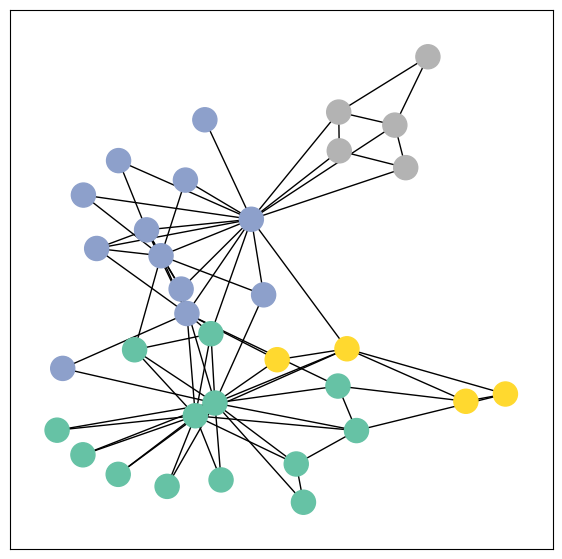

In [23]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Documentation



You can explore more PyG functions through its [documentation](https://pytorch-geometric.readthedocs.io/en/latest/).

# **Learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!\

**Note**: Make sure to **restart and run all** before submission, so that the intermediate variables / packages will carry over to the next cell

## Question 1: What is the average degree of the karate club network?

In [24]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of
  # the graph. Round the result to nearest integer (for example
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

#   avg_degree = 0

  ############# Your code here ############

  avg_degree = (2 * num_edges) / num_nodes
  # Round the result to the nearest integer
  avg_degree = round(avg_degree)
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## the average clustering coefficient of the karate club network

In **NetworkX**, the **average clustering coefficient** measures how strongly nodes in a graph tend to cluster together — i.e., how likely it is that two neighbors of a node are also neighbors of each other.

You can compute it using the built-in function:

```python
import networkx as nx

# Example: create a simple graph
G = nx.erdos_renyi_graph(n=10, p=0.4)

# Compute the average clustering coefficient
avg_clustering = nx.average_clustering(G)

print(avg_clustering)
```

### 🔍 Explanation

* **`nx.average_clustering(G)`**
  Returns the *average* of the local clustering coefficients for all nodes in the graph.

* **Local clustering coefficient** for a node ( v ):
  $$
  C_v = \frac{2 \times \text{number of edges between neighbors of } v}{k_v (k_v - 1)}
  $$
  where $ k_v $ is the degree of ( v ).

* The **average clustering coefficient** is simply the mean of $ C_v $ over all nodes ( v ).

### Optional parameters:

You can control how the function behaves:

```python
nx.average_clustering(G, nodes=None, weight=None, count_zeros=True)
```

* `nodes`: compute only for a subset of nodes
* `weight`: specify an edge attribute to use as weight
* `count_zeros`: if `False`, exclude nodes with degree < 2

Would you like me to show how to compute and visualize clustering coefficients for each node (e.g., as a histogram)?


In [25]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

#   avg_cluster_coef = 0

  ############# Your code here ############
  ## Note:
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef = nx.average_clustering(G)

  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.5706384782076823


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [26]:
import torch
print(torch.__version__)

2.8.0+cpu


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [28]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.3562, 0.5269, 0.9447, 0.3381],
        [0.3068, 0.4727, 0.7203, 0.6860],
        [0.1460, 0.1841, 0.0451, 0.4331]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [29]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Get the edge list of the karate club network and transform it into `torch.LongTensor`.

In [30]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected
  # by two nodes.

#   edge_list = []

  ############# Your code here ############
  edge_list = list(G.edges())

  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2, len(edge_list)].

  ############# Your code here ############
  pos_edge_index = torch.LongTensor(edge_list).t()

  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 156])
The pos_edge_index tensor has sum value 5070


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [31]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.8.0+cpu


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [32]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [33]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.1795,  1.8176, -0.0501, -0.0322,  0.5628, -0.1196, -1.0758, -1.2390]],
       grad_fn=<EmbeddingBackward0>)
tensor([[ 0.1795,  1.8176, -0.0501, -0.0322,  0.5628, -0.1196, -1.0758, -1.2390],
        [-0.4763,  0.4607,  1.4119, -0.7764, -1.4340,  0.6270, -1.0887,  0.5849]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


## Now, it's time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [38]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change
  # the values of num_node and embedding_dim. The weight matrix of returned
  # layer should be initialized under uniform distribution.


  ############# Your code here ############
  emb = torch.nn.Embedding(num_node, embedding_dim)
  emb.weight.data.uniform_(0, 1)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor(range(34))

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[2.1136e-01, 7.3349e-01, 1.4330e-01, 9.6468e-01, 2.9333e-01, 7.9514e-01,
         5.1703e-01, 2.8010e-01, 8.3389e-01, 1.1848e-01, 2.3546e-01, 5.5993e-01,
         8.9664e-01, 2.8577e-01, 1.9553e-01, 1.8079e-01],
        [2.7956e-01, 3.2728e-01, 3.8354e-01, 2.1556e-01, 6.5627e-01, 5.0406e-01,
         1.7332e-01, 2.1447e-01, 6.0588e-01, 4.9286e-01, 8.5387e-01, 4.2420e-01,
         9.4949e-02, 1.3019e-01, 3.5324e-01, 3.8926e-01],
        [5.5706e-01, 3.8786e-01, 6.8449e-01, 3.3371e-01, 8.6698e-01, 6.1484e-01,
         3.4628e-01, 9.4560e-01, 6.2765e-01, 1.6021e-01, 2.2173e-01, 8.1351e-01,
         7.2836e-01, 8.9040e-01, 4.6159e-01, 8.4971e-01],
        [7.4859e-01, 6.5463e-01, 3.8428e-01, 9.8199e-01, 6.0118e-01, 3.7099e-01,
         4.9289e-01, 9.9152e-01, 8.3583e-01, 4.6295e-01, 9.9018e-01, 7.1957e-01,
         2.3379e-01, 4.4966e-02, 7.9057e-01, 9.6892e-01],
        [2.0869e-01, 7.0536e-01, 5.2129e-01, 3.9309e-01, 3.6404e-01, 6.3910e-01,
         6

## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then we visualize each point, colored by the community it belongs to.

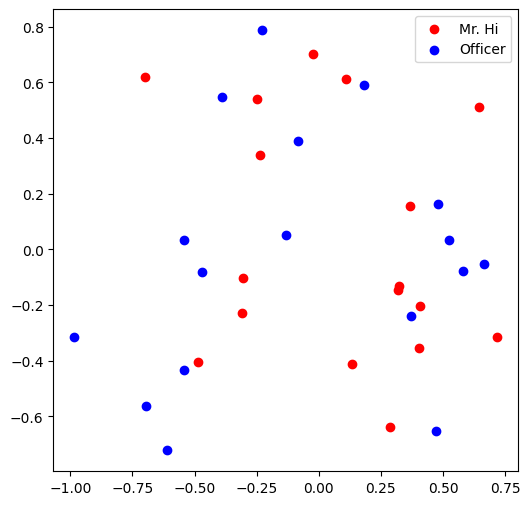

In [35]:
from sklearn.decomposition import PCA
 
G = nx.karate_club_graph()


def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

"Negative" edges refer to the edges/links that do not exist in the graph. The term "negative" is borrowed from "negative sampling" in link prediction. It has nothing to do with the edge weights.

For example, given an edge (src, dst), you should check that neither (src, dst) nor (dst, src) are edges in the Graph. If these hold true, then it is a negative edge.

In [40]:
from torch.optim import SGD
import torch.nn as nn
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation
  # works on the karate club network. In this implementation, self loops should
  # not be considered as either a positive or negative edge. Also, notice that
  # the karate club network is an undirected graph, if (0, 1) is a positive
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  # Get the set of all nodes in the graph
  all_nodes = set(G.nodes())

      # Iterate to sample negative edges
  while len(neg_edge_list) < num_neg_samples:
    # Randomly select two nodes
    src, dst = random.sample(list(all_nodes), 2)
    # Check if the selected edge doesn't exist in the graph
    if not G.has_edge(src, dst) and not G.has_edge(dst, src):
      neg_edge_list.append((src, dst))

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)

In [42]:
neg_edge_index.shape

torch.Size([2, 156])

We want to optimize our embeddings for the task of classifying edges as positive or negative. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to the previous questions are correct.

## 🎯 Overall Purpose

The code learns **node embeddings** (vectors for each node) such that the **dot product** between two node embeddings approximates whether there is an **edge** (connection) between them.

This is the typical setup for **link prediction using embeddings**, e.g. in GraphSAGE, DeepWalk, or Node2Vec post-training steps.

---

## 🧩 Function 1: `accuracy(pred, label)`

### Purpose

Computes **binary classification accuracy** from sigmoid outputs.

### How it works

```python
pred_binary = (pred > 0.5).float()
accu = (pred_binary == label).float().mean().item()
accu = round(accu, 4)
```

* If the sigmoid output > 0.5 → predict class **1 (edge exists)**
  Else → predict class **0 (no edge)**
* Compares predictions to true labels (`label`)
* Computes the fraction that are correct (`mean()`)
* Rounds to 4 decimal places (e.g., `0.82956 → 0.8296`)

So this gives a human-readable measure of how well the embeddings distinguish existing vs. non-existing edges.

---

## 🧩 Function 2: `train(emb, loss_fn, sigmoid, train_label, train_edge)`

### Purpose

Trains the node embedding parameters to predict whether an edge exists between two nodes.

### Step-by-step:

1. **Setup**

   ```python
   optimizer = SGD(emb.parameters(), lr=0.1, momentum=0.9)
   epochs = 500
   ```

   Uses stochastic gradient descent to update embeddings.

2. **Loop over epochs**

   ```python
   emb_train = emb(train_edge)
   ```

   * `train_edge` is a tensor of shape `[2, num_edges]`, listing node pairs.
   * `emb(train_edge)` retrieves embeddings for both endpoints of each edge, e.g.

     * `emb_train[0]` → embeddings of source nodes
     * `emb_train[1]` → embeddings of target nodes

3. **Dot product similarity**

   ```python
   dot_product = emb_train[0].mul(emb_train[1]).sum(dim=1)
   ```

   * The dot product measures how "similar" two node embeddings are.
   * High dot product → nodes likely connected.

4. **Sigmoid activation**

   ```python
   pred = sigmoid(dot_product)
   ```

   * Converts raw similarity scores into probabilities between 0 and 1.

5. **Loss computation**

   ```python
   loss = loss_fn(pred, train_label)
   ```

   * Uses **binary cross-entropy loss** (`nn.BCELoss`) to penalize wrong predictions.
   * `train_label` is `1` for positive (real) edges, `0` for negative (fake) edges.

6. **Accuracy and monitoring**

   ```python
   accuracy_value = accuracy(pred, train_label)
   print(f"Epoch {i}: Loss: {loss.item()}, Accuracy: {accuracy_value}")
   ```

   * Prints training progress; ideally loss ↓ and accuracy ↑ over epochs.

7. **Gradient update**

   ```python
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()
   ```

   * Standard PyTorch training loop to adjust embedding weights.

---

## 🧮 Before Training

The setup:

```python
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )
train_label = torch.cat([pos_label, neg_label], dim=0)
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
```

* **`pos_edge_index`**: real edges (from the graph)
* **`neg_edge_index`**: fake edges (sampled random pairs)
* Labels:

  * `1` → positive edges
  * `0` → negative edges

So the model learns to assign **high dot products to real edges** and **low dot products to fake edges**.

---

## 🧠 Conceptually

This is a **link prediction learning loop**:

* Input: node embeddings (`emb`)
* Target: whether pairs of nodes are connected
* Objective: tune embeddings so that
  `sigmoid(dot(u_i, u_j)) ≈ 1` for true edges
  and `≈ 0` for false edges.

Over time, embeddings capture graph topology — nodes with similar connectivity patterns become close in embedding space.



In [36]:
def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the
  # pred tensor (the resulting tensor after sigmoid) and the label
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places.
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  ############# Your code here ############
  pred_binary = (pred > 0.5).float()
  # Calculate accuracy
  accu = (pred_binary == label).float().mean().item()
  # Round the accuracy to 4 decimal places
  accu = round(accu, 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and
  # learning rate. In general, you need to implement:
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch
  # (6) Update the embeddings using the loss and optimizer
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    # Forward pass: Compute predicted y by passing x to the model
    emb_train = emb(train_edge)
    dot_product = emb_train[0].mul(emb_train[1]).sum(dim=1)
    pred = sigmoid(dot_product)

    # Compute and print loss
    loss = loss_fn(pred, train_label)
    accuracy_value = accuracy(pred, train_label)
    print(f"Epoch {i}: Loss: {loss.item()}, Accuracy: {accuracy_value}")

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, sigmoid, train_label, train_edge)

torch.Size([2, 156])
torch.Size([2, 312])
Epoch 0: Loss: 2.014157295227051, Accuracy: 0.5
Epoch 1: Loss: 1.9959752559661865, Accuracy: 0.5
Epoch 2: Loss: 1.9618157148361206, Accuracy: 0.5
Epoch 3: Loss: 1.91399085521698, Accuracy: 0.5
Epoch 4: Loss: 1.8548568487167358, Accuracy: 0.5
Epoch 5: Loss: 1.7867740392684937, Accuracy: 0.5
Epoch 6: Loss: 1.7120758295059204, Accuracy: 0.5
Epoch 7: Loss: 1.6330444812774658, Accuracy: 0.5
Epoch 8: Loss: 1.5518826246261597, Accuracy: 0.5
Epoch 9: Loss: 1.4706814289093018, Accuracy: 0.5
Epoch 10: Loss: 1.3913748264312744, Accuracy: 0.5
Epoch 11: Loss: 1.3156840801239014, Accuracy: 0.5
Epoch 12: Loss: 1.2450512647628784, Accuracy: 0.5
Epoch 13: Loss: 1.180573582649231, Accuracy: 0.5
Epoch 14: Loss: 1.122951626777649, Accuracy: 0.5
Epoch 15: Loss: 1.0724669694900513, Accuracy: 0.5
Epoch 16: Loss: 1.029005527496338, Accuracy: 0.5
Epoch 17: Loss: 0.9921223521232605, Accuracy: 0.5
Epoch 18: Loss: 0.9611416459083557, Accuracy: 0.5
Epoch 19: Loss: 0.935262

## Visualize the final node embeddings
Visualize your final embedding here!
You can visually compare the figure with the previous embedding figure.
After training, you should oberserve that the two classes are more evidently separated.
This is a great sanitity check for your implementation as well.

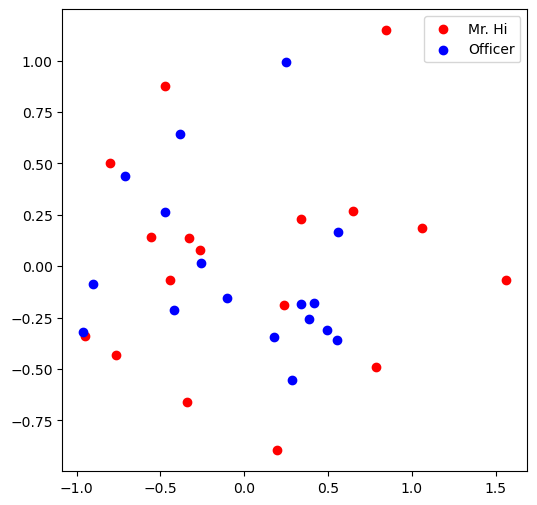

In [37]:
# Visualize the final learned embedding
visualize_emb(emb)